In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings("ignore")


In [2]:
#данные о состоянии воздуха
df = pd.read_csv('e:/DS/data/air/AirQualityUCI.csv',  sep=';')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",NaN,NaN
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028",NaN,NaN


In [5]:
df  = df[df['Date'].notnull()]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.3+ MB


In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S.%f')
df['Date']  = df['Date'].str.replace('/','-')
df['Time'] = df['Time'].str.replace('.',':')


In [9]:
df['datetime']  = df['Date'] + ' ' + df['Time']
df['datetime']  = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [10]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.').astype('float')
df['CO(GT)'].fillna(value=0, inplace=True)


In [11]:
df.to_csv('t.csv', sep=';')
df2 = pd.read_csv('t.csv',  sep=';',  index_col='datetime')


In [12]:
df2 = df2[(df2['Time']!='04:00:00')]

In [13]:
df2 =  df2[(df2['CO(GT)']>=0)]

In [14]:
#cols = ['CO(GT)']
#ts = df2[(df2['Date']>='2004-03-11') & (df2['Date']<='2004-03-14')][cols]


In [305]:
#df[df['CO(GT)']<-10]
#df[(df['Date']>='2004-03-11') & (df['Date']<='2004-03-12')]

In [15]:
# возьмем данные в одно и тоже время суток
cols = ['CO(GT)']
ts2 = df2[(df2['Time']=='03:00:00') ][cols]

In [16]:
ts2.head()

,CO(GT)
datetime,
2004-03-11 03:00:00,0.6
2004-03-12 03:00:00,0.8
2004-03-13 03:00:00,1.7
2004-03-14 03:00:00,2.4
2004-03-15 03:00:00,1.1


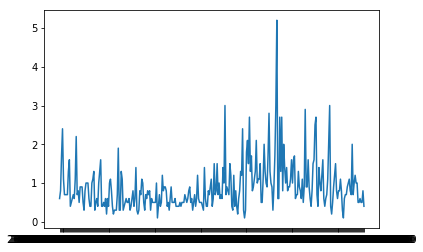

In [17]:
plt.plot(ts2)

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(30).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(30).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    


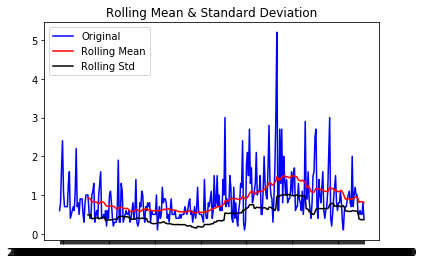

Results of Dickey-Fuller Test:
Test Statistic                  -2.519333
p-value                          0.110841
#Lags Used                      10.000000
Number of Observations Used    301.000000
Critical Value (1%)             -3.452263
Critical Value (5%)             -2.871191
Critical Value (10%)            -2.571912
dtype: float64


In [20]:
#проверим ряд на стационарность
test_stationarity(ts2)

Test Statistic меньше Critical Value, значит ряд стационарный с вероятностью 0,89

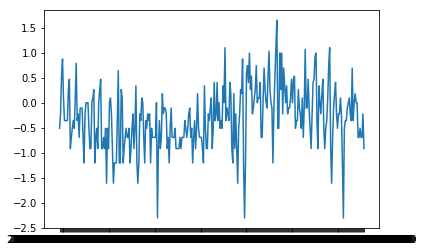

In [21]:
#логорифмируем, сглаживаем
ts_log = np.log(ts2)
plt.plot(ts_log)

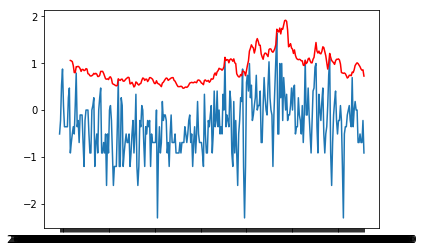

In [22]:
# посмотри тренд 
moving_avg = ts2.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Тренда нет

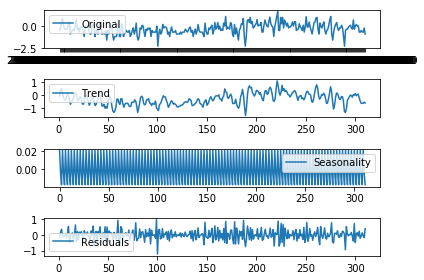

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decomposition = seasonal_decompose(ts_log)
decomposition = seasonal_decompose(np.asarray(ts_log), freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
len(ts_log)


312

In [27]:
from statsmodels.tsa.stattools import acf, pacf

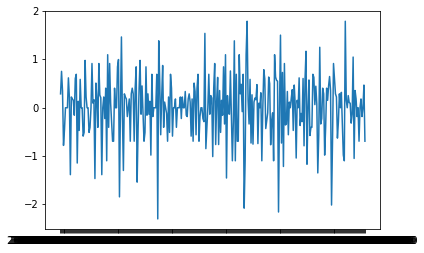

In [28]:
#рассмотрим разницу между ближайщими днями
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

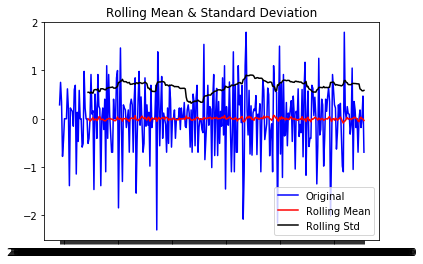

Results of Dickey-Fuller Test:
Test Statistic                -1.014097e+01
p-value                        8.422655e-18
#Lags Used                     9.000000e+00
Number of Observations Used    3.010000e+02
Critical Value (1%)           -3.452263e+00
Critical Value (5%)           -2.871191e+00
Critical Value (10%)          -2.571912e+00
dtype: float64


In [29]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Test Statistic   удалось еще уменьшить

In [30]:
from statsmodels.tsa.stattools import acf, pacf

In [31]:
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

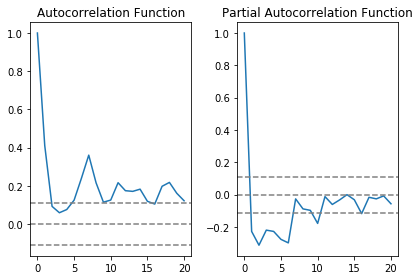

In [32]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Смотрим, где кривая пересекает верхний доверительный интервал первый раз.
для q - ACF, p - PACF

In [33]:
q = 3
p = 2

In [34]:
from statsmodels.tsa.arima_model import ARIMA  # (p,d,q)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 86.8316')

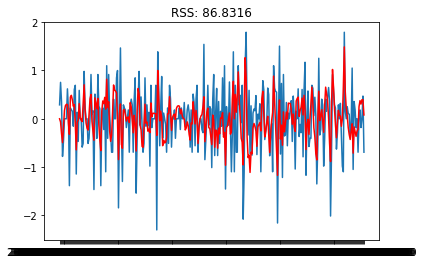

In [35]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff.T.squeeze())**2))


In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

datetime
2004-03-12 03:00:00   -0.000857
2004-03-13 03:00:00   -0.067003
2004-03-14 03:00:00   -0.309455
2004-03-15 03:00:00   -0.494093
2004-03-16 03:00:00   -0.161265
dtype: float64


In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

datetime
2004-03-12 03:00:00   -0.000857
2004-03-13 03:00:00   -0.067860
2004-03-14 03:00:00   -0.377315
2004-03-15 03:00:00   -0.871407
2004-03-16 03:00:00   -1.032672
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.head()

datetime
2004-03-11 03:00:00         NaN
2004-03-12 03:00:00   -0.000857
2004-03-13 03:00:00   -0.067003
2004-03-14 03:00:00   -0.309455
2004-03-15 03:00:00   -0.494093
dtype: float64

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 0.8575')

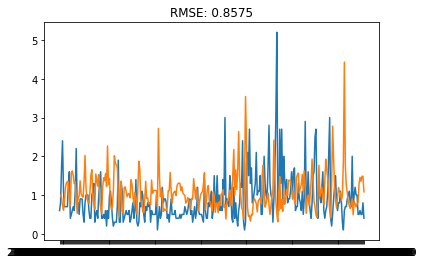

In [56]:
plt.plot(ts2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA[1:,]-ts2.iloc[1:,:].T.squeeze())**2)/len(ts2)))

Text(0.5,1,'RMSE: 0.8575')

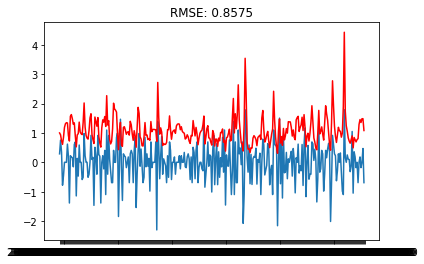

In [57]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_log_diff)
plt.plot(predictions_ARIMA, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA[1:,]-ts2.iloc[1:,:].T.squeeze())**2)/len(ts2)))

In [58]:
p = range(0, 4)
d = (1,)
q = range(0, 4)

from itertools import product

parameters = product(p, d, q)
parameters_list = list(parameters)
len(parameters_list)

16

In [59]:
for p, d, q in parameters_list:
    try:
        model = ARIMA(ts_log, order=(p, d, q))  
        results_ARIMA = model.fit(disp=-1)  
        rss = sum((results_ARIMA.fittedvalues - ts_log_diff.T.squeeze())**2)
        print('for p={}, d={}, q={} RSS is {}'.format(p, d, q, rss))
    except:
        pass   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

for p=0, d=1, q=0 RSS is 135.0783677995285
for p=0, d=1, q=1 RSS is 99.57654480325938
for p=0, d=1, q=2 RSS is 89.52651506407574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


for p=0, d=1, q=3 RSS is 89.31580356511303
for p=1, d=1, q=0 RSS is 128.10442126079226


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

for p=1, d=1, q=1 RSS is 91.9861027261416


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


for p=1, d=1, q=2 RSS is 89.40368104592106


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


for p=1, d=1, q=3 RSS is 88.70223606240666
for p=2, d=1, q=0 RSS is 115.6297455807247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

for p=2, d=1, q=1 RSS is 88.16942736708481


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


for p=2, d=1, q=2 RSS is 86.8315738529245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


for p=2, d=1, q=3 RSS is 86.83150369932363
for p=3, d=1, q=0 RSS is 110.08531614947206


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

for p=3, d=1, q=1 RSS is 87.68901400948289


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


for p=3, d=1, q=2 RSS is 86.83154963140917


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 86.8315')

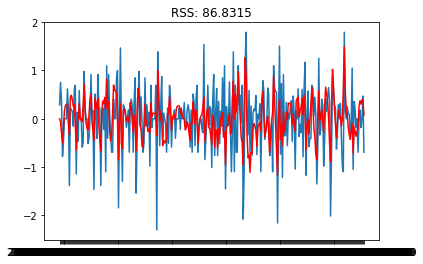

In [60]:
model = ARIMA(ts_log, order=(2, 1, 3))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff.T.squeeze())**2))

Text(0.5,1,'RMSE: 0.8575')

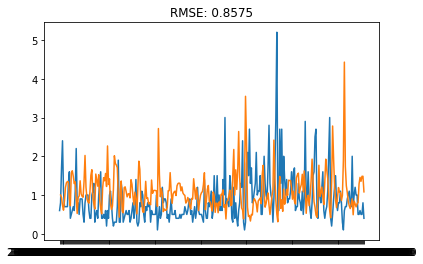

In [63]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA[1:,]-ts2.iloc[1:,:].T.squeeze())**2)/len(ts2)))

### 3. ML модель

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, tree, linear_model
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [145]:
df2.head()

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
datetime,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,0,2004-03-10,18:00:00,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
2004-03-10 19:00:00,1,2004-03-10,19:00:00,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2004-03-10 20:00:00,2,2004-03-10,20:00:00,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
2004-03-10 21:00:00,3,2004-03-10,21:00:00,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
2004-03-10 22:00:00,4,2004-03-10,22:00:00,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [146]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [147]:
# возьмем данные в одно и тоже время суток
cols = ['CO(GT)']
ts3 = df2[(df2['Time']=='03:00:00') ]


In [148]:
ts3.head()

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
datetime,,,,,,,,,,,,,,,,,,
2004-03-11 03:00:00,9,2004-03-11,03:00:00,0.6,1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN
2004-03-12 03:00:00,33,2004-03-12,03:00:00,0.8,889.0,21.0,"1,9",574.0,-200.0,1680.0,-200.0,1187.0,512.0,"7,0","62,3","0,6261",NaN,NaN
2004-03-13 03:00:00,57,2004-03-13,03:00:00,1.7,1172.0,46.0,"5,4",783.0,-200.0,1179.0,-200.0,1380.0,996.0,"7,8","67,5","0,7173",NaN,NaN
2004-03-14 03:00:00,81,2004-03-14,03:00:00,2.4,1344.0,132.0,"9,7",968.0,-200.0,921.0,-200.0,1620.0,1278.0,"11,6","63,4","0,8674",NaN,NaN
2004-03-15 03:00:00,105,2004-03-15,03:00:00,1.1,1078.0,44.0,"4,4",734.0,-200.0,1128.0,-200.0,1487.0,1021.0,"12,6","63,5","0,9230",NaN,NaN


In [149]:
ts3 = ts3.groupby(ts3['Date'].dt.week).mean() 

In [150]:
cols = ['CO(GT)']
ts3 = ts3[cols]
ts3.head()

,CO(GT)
Date,
1,1.442857
2,1.257143
3,0.840000
4,0.833333
5,1.228571


In [151]:
#создаем дополнительные прризнаки
ts3['Last_Week'] = ts3['CO(GT)'].shift()
ts3['Last_Week_Diff'] = ts3['Last_Week'].diff()  # do not look into the future!!!
ts3 = ts3.dropna()
ts3.head()

,CO(GT),Last_Week,Last_Week_Diff
Date,,,
3,0.840000,1.257143,-0.185714
4,0.833333,0.840000,-0.417143
5,1.228571,0.833333,-0.006667
6,1.442857,1.228571,0.395238
7,1.014286,1.442857,0.214286


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [152]:
ts3= ts3.reset_index().sort_values('Date')
X = ts3[['Last_Week','Last_Week_Diff']]
Y = ts3['CO(GT)']

In [179]:
#X_train, X_test, y_train, y_test = prepareData(ts3, test_size=0.3)

In [180]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

 Пробуем линейную регрессию

In [190]:
mean_error = []
pred_y = []
test_y = []

for week in range(31, 50):
   
    train = ts3[ts3['Date'] < week]
    val = ts3[ts3['Date'] == week]
    
    xtr, xts = train.drop(['CO(GT)'], axis=1), val.drop(['CO(GT)'], axis=1)
    ytr, yts = train['CO(GT)'].values, val['CO(GT)'].values
    
    lr = LinearRegression()
    lr.fit(xtr, ytr)
    prediction = lr.predict(xts)
    
    error = rmsle(yts,prediction)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
    pred_y.append(prediction)
    test_y.append(yts)
    
print('Mean Error = %.5f' % np.mean(mean_error))

Week 31 - Error 0.03041
Week 32 - Error 0.10382
Week 33 - Error 0.00373
Week 34 - Error 0.01275
Week 35 - Error 0.06764
Week 36 - Error 0.17535
Week 37 - Error 0.06531
Week 38 - Error 0.22412
Week 39 - Error 0.12845
Week 40 - Error 0.10611
Week 41 - Error 0.29043
Week 42 - Error 0.03854
Week 43 - Error 0.39125
Week 44 - Error 0.21468
Week 45 - Error 0.32628
Week 46 - Error 0.12165
Week 47 - Error 0.10835
Week 48 - Error 0.37298
Week 49 - Error 0.16382
Mean Error = 0.15504


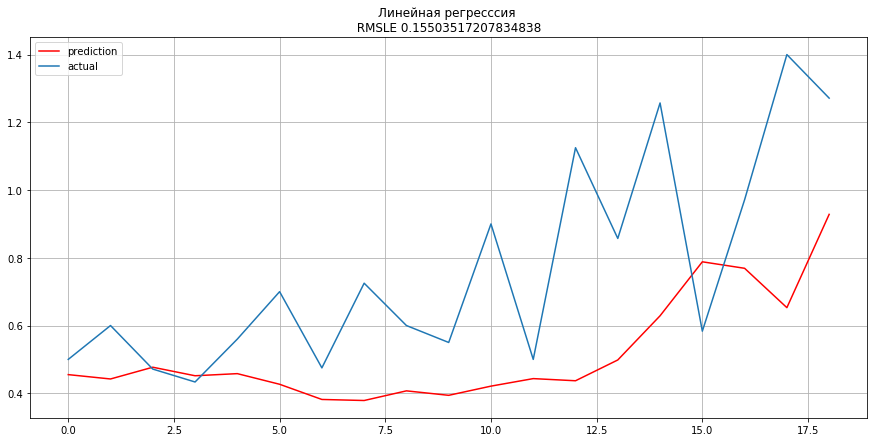

In [192]:
plt.figure(figsize=(15, 7))
plt.plot(pred_y, "r", label="prediction")
plt.plot(test_y, label="actual")
plt.legend(loc="best")
plt.title("Линейная регресссия \n RMSLE {} ".format(np.mean(mean_error),5))
plt.grid(True);

Применим случайный лес

In [193]:
mean_error = []
pred_y = []
test_y = []

for week in range(31, 50):
    
    train = ts3[ts3['Date'] < week]
    val = ts3[ts3['Date'] == week]
    
    xtr, xts = train.drop(['CO(GT)'], axis=1), val.drop(['CO(GT)'], axis=1)
    ytr, yts = train['CO(GT)'].values, val['CO(GT)'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
    pred_y.append(p)
    test_y.append(yts)
    
print('Mean Error = %.5f' % np.mean(mean_error))

Week 31 - Error 0.09627
Week 32 - Error 0.04579
Week 33 - Error 0.11496
Week 34 - Error 0.09998
Week 35 - Error 0.01846
Week 36 - Error 0.10068
Week 37 - Error 0.06375
Week 38 - Error 0.10656
Week 39 - Error 0.04819
Week 40 - Error 0.00653
Week 41 - Error 0.15386
Week 42 - Error 0.14986
Week 43 - Error 0.18167
Week 44 - Error 0.02777
Week 45 - Error 0.17794
Week 46 - Error 0.20650
Week 47 - Error 0.01573
Week 48 - Error 0.30326
Week 49 - Error 0.14279
Mean Error = 0.10845


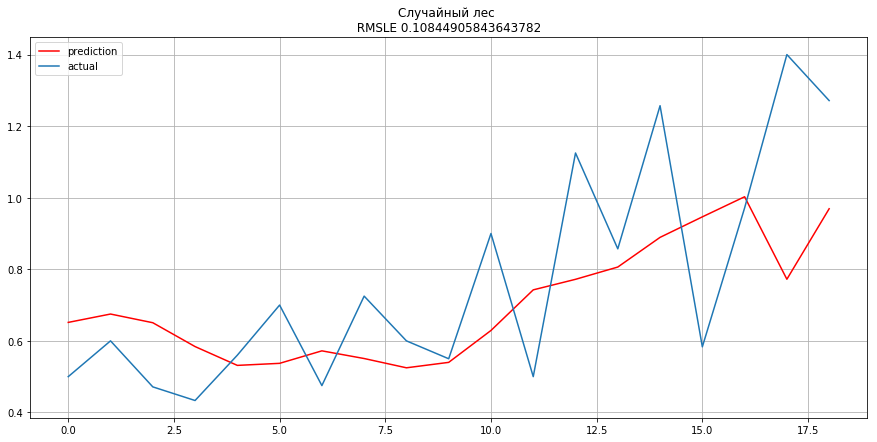

In [194]:
plt.figure(figsize=(15, 7))
plt.plot(pred_y, "r", label="prediction")
plt.plot(test_y, label="actual")
plt.legend(loc="best")
plt.title("Cлучайный лес \n RMSLE {} ".format(np.mean(mean_error),5))
plt.grid(True);

Градиентный бустинг 

In [195]:
mean_error = []
pred_y = []
test_y = []
for week in range(31, 50):
    
    train = ts3[ts3['Date'] < week]
    val = ts3[ts3['Date'] == week]
    
    xtr, xts = train.drop(['CO(GT)'], axis=1), val.drop(['CO(GT)'], axis=1)
    ytr, yts = train['CO(GT)'].values, val['CO(GT)'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
    pred_y.append(p)
    test_y.append(yts)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 31 - Error 0.17250
Week 32 - Error 0.10201
Week 33 - Error 0.18238
Week 34 - Error 0.20273
Week 35 - Error 0.11171
Week 36 - Error 0.02238
Week 37 - Error 0.16370
Week 38 - Error 0.00245
Week 39 - Error 0.07761
Week 40 - Error 0.10726
Week 41 - Error 0.09916
Week 42 - Error 0.13977
Week 43 - Error 0.21203
Week 44 - Error 0.14262
Week 45 - Error 0.31098
Week 46 - Error 0.07239
Week 47 - Error 0.16833
Week 48 - Error 0.35360
Week 49 - Error 0.26052
Mean Error = 0.15285


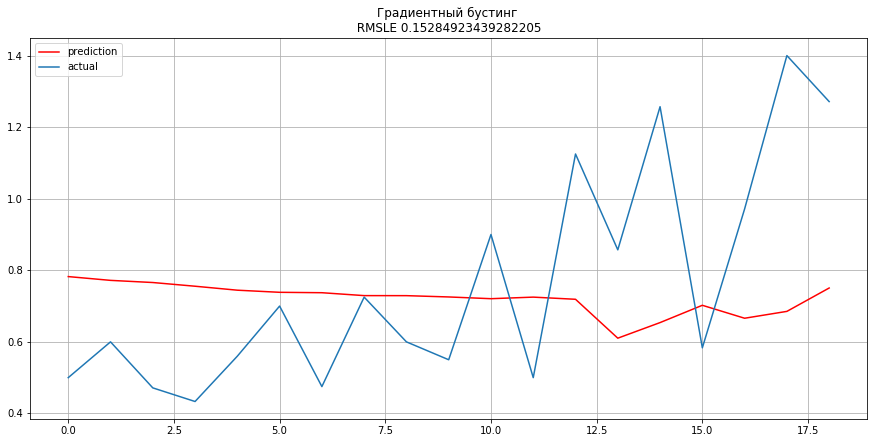

In [196]:
plt.figure(figsize=(15, 7))
plt.plot(pred_y, "r", label="prediction")
plt.plot(test_y, label="actual")
plt.legend(loc="best")
plt.title("Градиентный бустинг \n RMSLE {} ".format(np.mean(mean_error),5))
plt.grid(True);

 В данном случае RandomForestRegressor показывает лучшие результаты